<h3>What features are causing California housing price?</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<h3>Loading California Housing Data</h3>

In [3]:
file_path = "content/sample_data/housing.csv"

In [4]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h2>Multi Linear Regression</h2>
<ul>
    <h3>>Independent Variables</h3>
    <li>longitude</li>
    <li>latitude</li>
    <li>housing_median_age</li>
    <li>total_rooms</li>
    <li>total_bedrooms</li>
    <li>population</li>
    <li>households</li>
    <li>median_income</li>
    <li>ocean_proximity</li>
    <h3>Dependent Variables</h3>
    <li>median_house_value</li>
</ul>

In [8]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<h2>Missing Data Analysis</h2>

In [9]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


<h2>Remove Missing Values or Imputation</h2>
<p>Total Bedrooms has 207 cases 1.003% </p>
<p>We do this to avoid Bias Results</p>
<p>Keep it and drop the missing values</p>

<h2>Imputation</h2>
<p>Systematically find a replacement</p>

In [10]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<h2>Data Exploration and Visualization</h2>

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h2>What are the percentiles for when analyzing data? 25th, 50th, 75th percentiles?</h2>

<h3>Observe the response variable. The Dependent variable of Median House Values.</h3>
<h4>Helps identify outliers</h4>

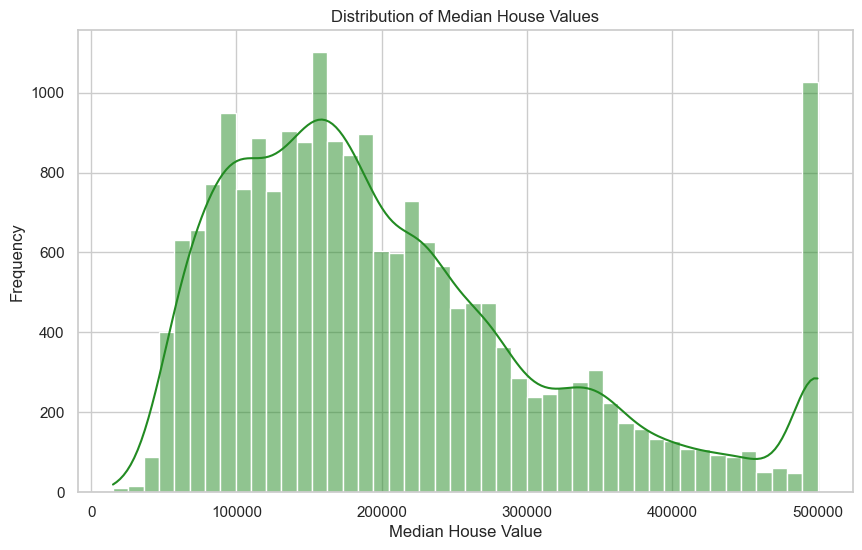

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

<h3>Using InterQuantile Range to Remove Ouliers</h3>

In [13]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


<h3>BoxPlot for Outlier Detection</h3>
<p>Another approach with median income</p>

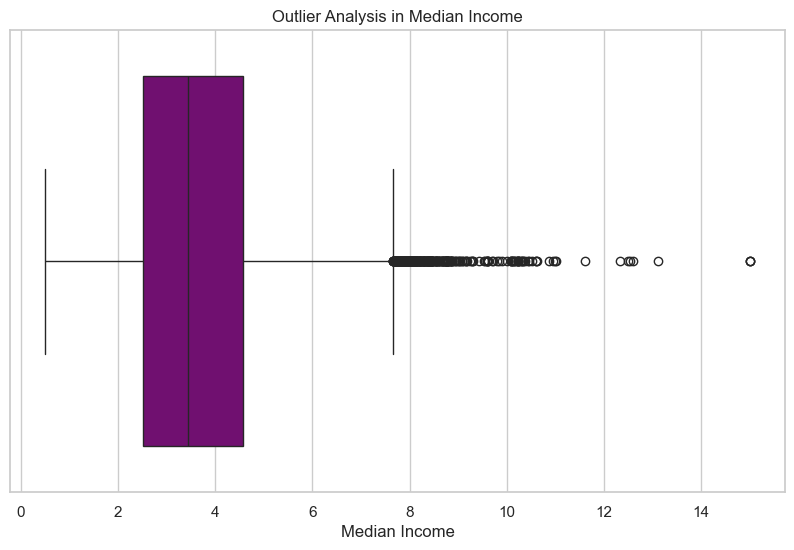

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [15]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [16]:
data = data_no_outliers_2

<h3>Correlation Heatmap</h3>

<p>Perfect multiple collinearity, also known as perfect multicollinearity, occurs when two or more independent variables in a multiple regression model are perfectly correlated with each other. This means that one independent variable can be expressed as an exact linear combination of the others.</p>

<h3>String Data Categorization to Dummy Variables for Ocean Proximity</h3>

In [17]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


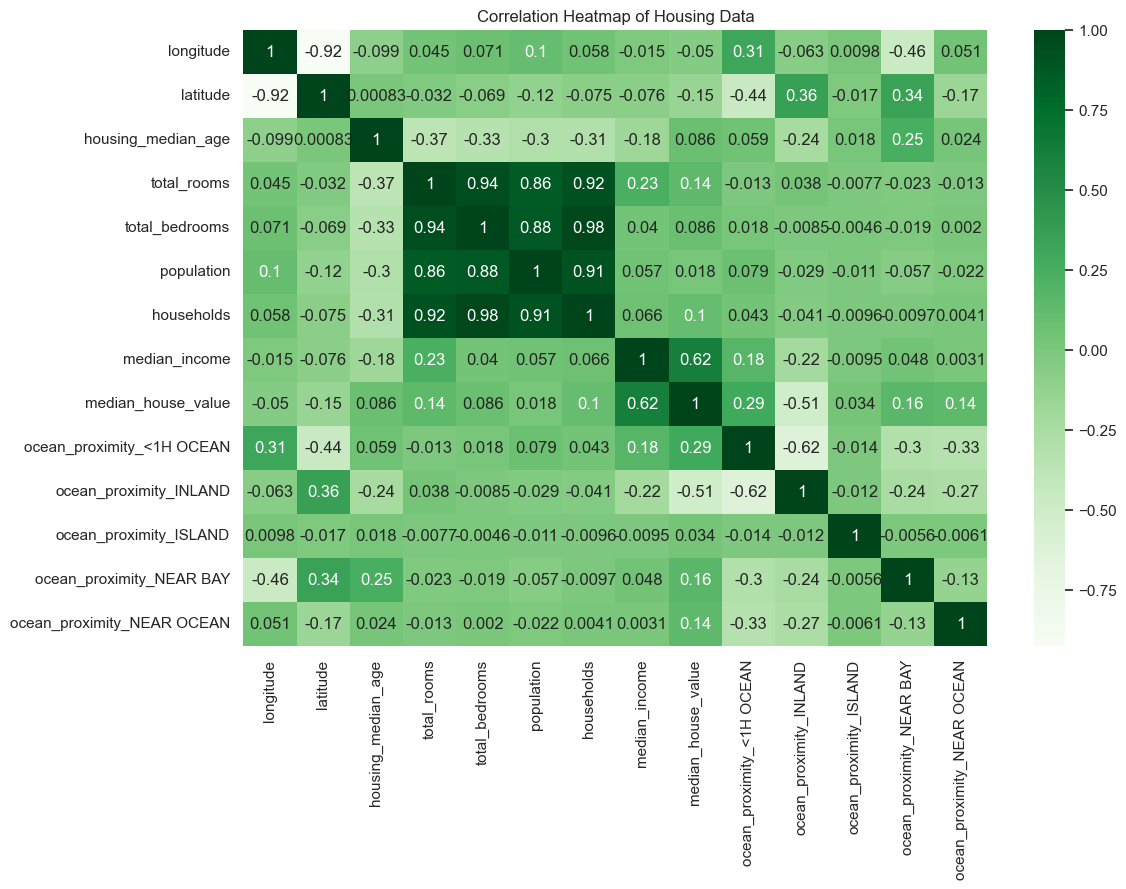

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [19]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,False,False,True,False
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,False,False,True,False


In [22]:
# Convert boolean columns to integers
for col in data.select_dtypes(include='bool').columns:
    data[col] = data[col].astype(int)

<h3>Splitting the Data into Train/Test</h3>

In [23]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


<h3>Training & Testing Linear Regression Model Statsmodels.api</h3>

In [24]:
X_train
print(data.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object


In [25]:
# Adding a constant to the predicators because statsmodel's OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [26]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:58:44   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<h4>Scikit does this automatically. Why we are using this model because it has a property of visualizations for PValues, TTest, Standard Errors.</h4>

<h2>Statistical Significance</h2>
<p>The p-value is a statistical measure that helps determine the significance of the results obtained in hypothesis testing. In the context of an OLS (Ordinary Least Squares) regression model, the p-value is used to test the null hypothesis that a particular coefficient (independent variable) is equal to zero (i.e., the variable has no effect on the dependent variable).

Understanding the p-value
Low p-value (typically ≤ 0.05): Indicates strong evidence against the null hypothesis, suggesting that the variable is statistically significant and has an impact on the dependent variable.
High p-value (> 0.05): Indicates weak evidence against the null hypothesis, suggesting that the variable is not statistically significant and may not have an impact on the dependent variable.</p>

<p>R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. It provides an indication of the goodness-of-fit of the model.

Key Points about R-squared
Range: R-squared values range from 0 to 1.
0: Indicates that the model explains none of the variability of the response data around its mean.
1: Indicates that the model explains all the variability of the response data around its mean.
Interpretation:
Higher R-squared: A higher value indicates a better fit of the model. It means a larger proportion of the variance in the dependent variable is predictable from the independent variables.
Lower R-squared: A lower value suggests that the model does not explain much of the variance in the dependent variable.
Example: If an R-squared value is 0.64, it means that 64% of the variance in the dependent variable can be explained by the independent variables in the model.</p>

<p>Adjusted R-squared
Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model. It is useful in comparing models with a different number of independent variables, as it takes into account the model's complexity.

Adjusted R-squared can be lower than R-squared if adding new variables does not improve the model's explanatory power significantly.
It is calculated using the formula:
</p>

<h2>Prediction / Testing</h2>

In [27]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

In [28]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,1,0,0,0
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,0,0,1,0
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,0,1,0,0
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,0,0,0,1
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,1,0,0,0
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,0,1,0,0
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,1,0,0,0
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,1,0,0,0


<h2>Checking OLS Assumptions</h2>

<h2> Assumption 1: Linearity </h2>

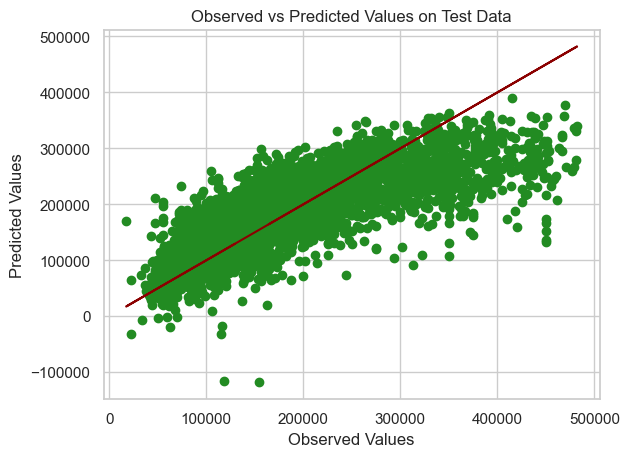

In [29]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

<p>Positive Linear Relationship: The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.</p>

<h2>Assumption 2: Random Sample</h2>

In [30]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


<p>While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.</p>

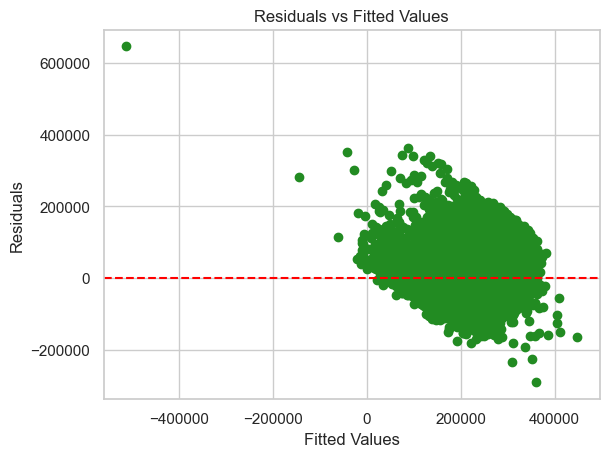

In [31]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

<p>In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.</p>

<h2>Assumption 3: Exogeneity</h2>

In [32]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: 0.0
Correlation between residuals and latitude: -0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.0
Correlation between residuals and ocean_proximity_INLAND: -0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


<p>Durbin-Wu-Hausman Test: For a more formal statistical test, use the Durbin-Wu-Hausman test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.</p>

<h2>Assumption 4: Homoskedasticty</h2>

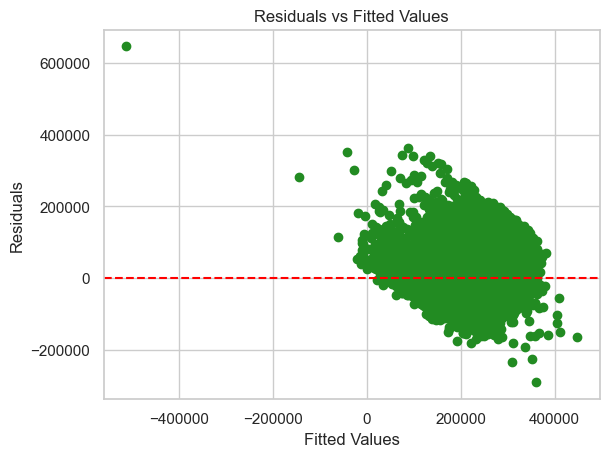

In [33]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

<p>Random Scatter: If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.
Pattern or Shape: If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.</p>

<h2>Train / Test / Evaluation with Sklearn </h2>

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59405.88869441674


In [36]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0


<h2>Next Steps to Improve Model</h2>
<h3>Overfitting</h3>
<p>GMM / GLS / FGLS - Reduce Errors </p>
<p>Lasso / Ridge Regression </p>
<p> Further Data Cleaning Remove more outliers </p>
<p> More Flexible ML Models to increase predictions </p>
<p> Normalize the Data </p>

<p>Change to the file</p>